In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

Для решения этой задачи мы как раз и используем наши навыки в снижении размерности и кластеризации данных: попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся.


Данные содержат следующие признаки:

- country — название страны;
- child_mort — показатель смертности детей до 5 лет;
- exports — показатель экспорта на душу населения;
- health — показатель затрат на здравоохранение на душу населения;
- imports — показатель импорта на душу населения;
- Income — средний доход на душу населения;
- Inflation — годовой показатель инфляции;
- life_expec — средняя продолжительность жизни;
- total_fer — суммарный коэффициент рождаемости;
- gdpp — значение ВВП на душу населения.

In [3]:
data = pd.read_csv('./data/Country-data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Задание 7.1
Какова максимальная продолжительность жизни? Ответ округлите до одного знака после точки-разделителя.

In [5]:
print(f'максимальная продолжительность жизни: {data.life_expec.max()}')

максимальная продолжительность жизни: 82.8


### Задание 7.2
Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого `StandardScaler`. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [6]:
X,y = data.drop(columns='country'),data.country

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ans = X_scaled[0][0]
round(ans,2)

1.29

### Задание 7.3
Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

0.9

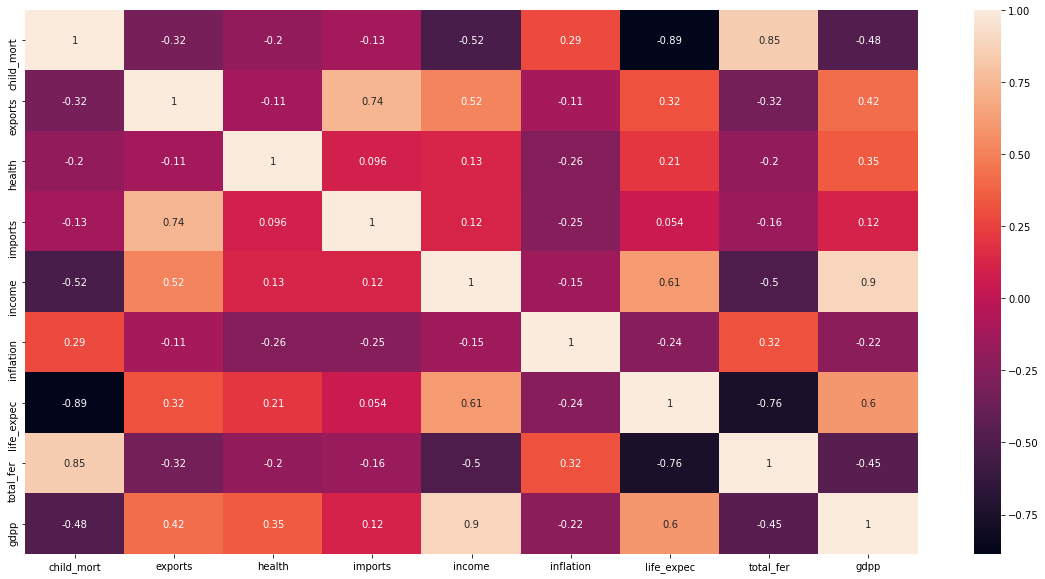

In [7]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

max_corr = (np.corrcoef(X_scaled.T)-np.eye(X_scaled.shape[1])).max()
round(max_corr,2)

In [8]:
max_corr = (np.corrcoef(X.T)-np.eye(X.shape[1])).max()
round(max_corr,2)

0.9

### Задание 7.4
Теперь понизим размерность данных — возьмём для этого метод главных компонент (`PCA`) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум `90 % `разброса данных.

In [43]:
# РЕШАЛ НОЧЬЮ, ПОЧЕМУТО РЕШИЛ ЧЕРЕЗ SVD
explained_variance = pd.Series([],dtype=float)

for n_components in range(1,X_scaled.shape[1]):
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd.fit(X_scaled)
    explained_variance = explained_variance.append(
        pd.Series(data = svd.explained_variance_ratio_.sum(),
                  index = [n_components]))
    
ans = explained_variance.index[explained_variance>0.9][0]
print(f'минимальное число компонент, которые суммарно могут объяснить'+
      f'как минимум 90 %разброса данных: {ans}')

минимальное число компонент, которые суммарно могут объяснитькак минимум 90 %разброса данных: 5


In [42]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(X_scaled)
print(f'минимальное число компонент, которые суммарно могут объяснить'+
      f'как минимум 90 %разброса данных: {len(pca.components_)}')

минимальное число компонент, которые суммарно могут объяснитькак минимум 90 %разброса данных: 5


### Задание 7.5
Оставьте только главные компоненты, выделенные в предыдущем задании. Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [47]:
print(f'Первая главная компонента объясняет {explained_variance[1]:.2f} долю дисперсии')
print(f'Первая главная компонента объясняет {pca.explained_variance_ratio_[0]:.2f} долю дисперсии')

Первая главная компонента объясняет 0.46 долю дисперсии
Первая главная компонента объясняет 0.46 долю дисперсии


### Задание 7.6
Как вы помните, при создании компонент с помощью `PCA` они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают $0.001$, не считая единичных значений на главной диагонали?

In [63]:
X_scaled_pca = pca.transform(X_scaled)
ans = ((np.corrcoef(X_scaled_pca,rowvar=False) - np.eye(5)) > 0.001).sum()

print(f'{ans} значений превышают 0.001')

0 значений превышают 0.001


### Задание 7.7
Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

In [75]:
silhouettes = pd.Series([],dtype=float)

for n_clusters in range(2,11):
    km = KMeans(n_clusters=n_clusters,init='k-means++',random_state=1)
    km.fit(X_scaled_pca)
    silhouettes = silhouettes.append(pd.Series(silhouette_score(X_scaled_pca,km.labels_),[n_clusters]))

silhouettes.idxmax()

4